In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('CAISO-20170701-20201030.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,start_dt,end_dt,total_integrated_load_MW,solar_generation_MW,wind_generation_MW
0,2017-07-01 07:00:00+00:00,2017-07-01 08:00:00+00:00,25703,-31.09459,2881.98320
1,2017-07-01 08:00:00+00:00,2017-07-01 09:00:00+00:00,24043,-30.83811,2765.90229
2,2017-07-01 09:00:00+00:00,2017-07-01 10:00:00+00:00,22988,-30.48083,2791.72076
3,2017-07-01 10:00:00+00:00,2017-07-01 11:00:00+00:00,22423,-31.98818,2549.59684
4,2017-07-01 11:00:00+00:00,2017-07-01 12:00:00+00:00,22235,-32.67630,2502.67552


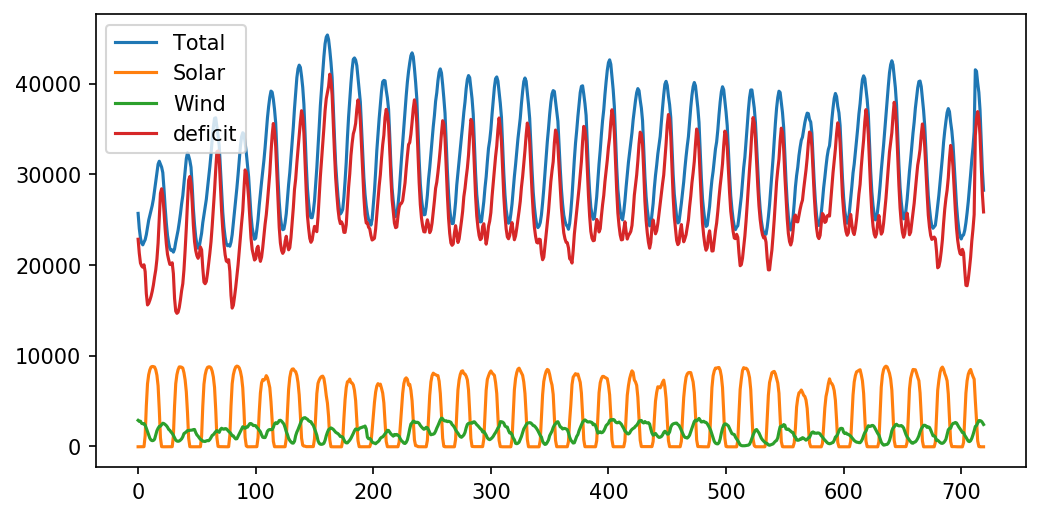

In [45]:
plt.figure(figsize=(8,4),dpi=150)
days = 30
plt.plot(df.index[:24*days],df['total_integrated_load_MW'][:24*days])
plt.plot(df.index[:24*days],df['solar_generation_MW'][:24*days])
plt.plot(df.index[:24*days],df['wind_generation_MW'][:24*days])
plt.plot(df.index[:24*days],(df['total_integrated_load_MW'] - df['wind_generation_MW']
                             - df['solar_generation_MW'])[:24*days])
plt.legend(['Total','Solar','Wind','deficit'])

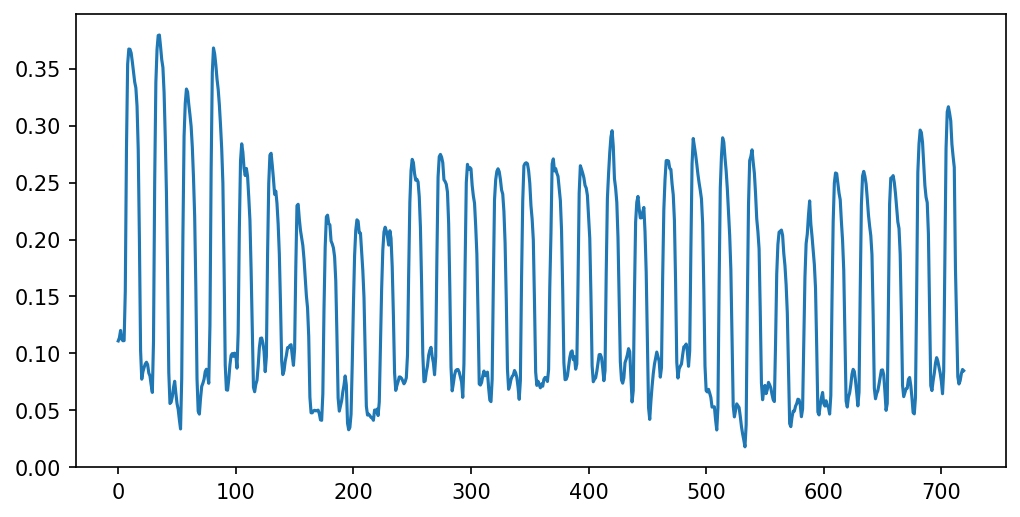

In [48]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(df.index[:24*days],((df['wind_generation_MW']
                             + df['solar_generation_MW'])/df['total_integrated_load_MW'])[:24*days])

In [50]:
edf = pd.read_csv('EIA-20180701-20201109.csv')
edf.drop('Unnamed: 0',inplace=True,axis=1)
edf.head()

,dt,demand_MWh,wind_gen_MWh,solar_gen_MWh
0,2018-07-01 08:00:00+00:00,26061,3958,0
1,2018-07-01 09:00:00+00:00,24604,4087,0
2,2018-07-01 10:00:00+00:00,23554,3710,0
3,2018-07-01 11:00:00+00:00,22843,3630,0
4,2018-07-01 12:00:00+00:00,22538,3156,0


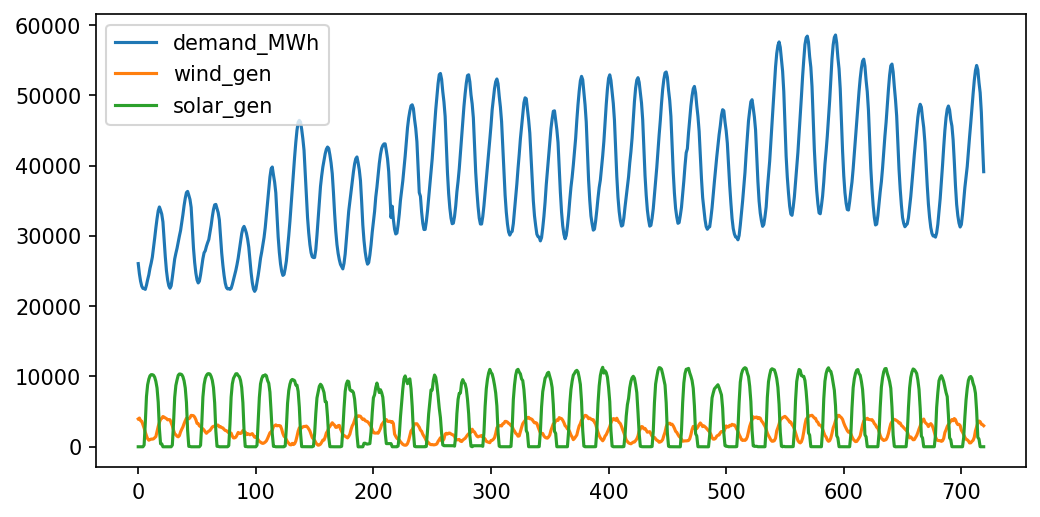

In [56]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(edf.index[:24*days],edf['demand_MWh'][:24*days])
plt.plot(edf.index[:24*days],edf['wind_gen_MWh'][:24*days])
plt.plot(edf.index[:24*days],edf['solar_gen_MWh'][:24*days])
plt.legend(['demand_MWh','wind_gen','solar_gen'])

In [66]:
df['total_integrated_load_MW'].max()

49909

In [77]:
def plot(plt,index,edf,df,name):
    plt.plot(index,edf)
    plt.plot(index,df)
    plt.legend(['EIA','CAISO'])
    plt.title(name)
    plt.ylim([min(df.min(),edf.min())-2000,max(df.max(),edf.max())+2000])

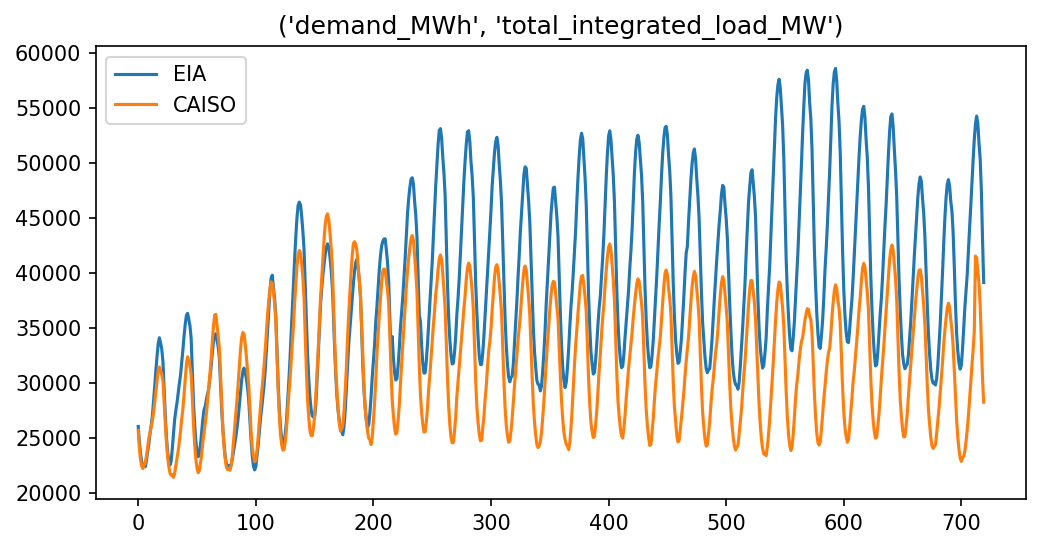

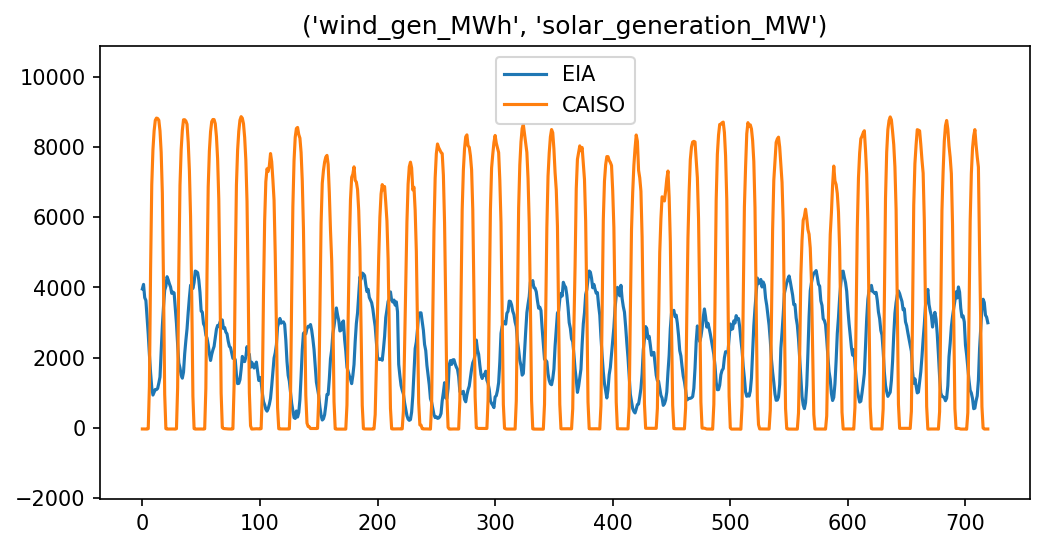

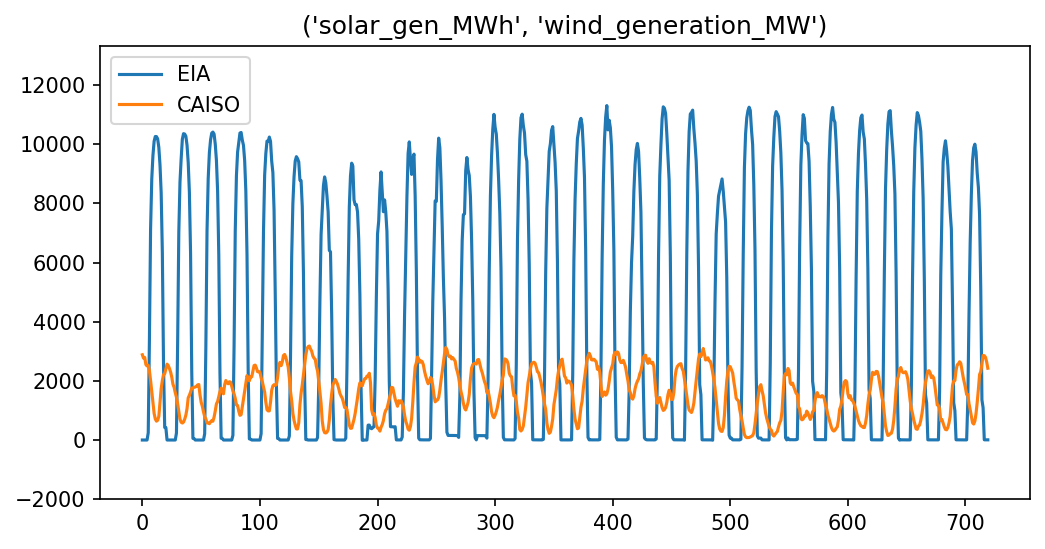

In [78]:
for e,d in zip(edf.columns[1:],df.columns[2:]):
    plt.figure(figsize=(8,4),dpi=150)
    plot(plt,edf.index[:24*days],edf[e][:24*days],df[d][:24*days],(e,d))

In [58]:
edf.columns

Index(['dt', 'demand_MWh', 'wind_gen_MWh', 'solar_gen_MWh'], dtype='object')